In [1]:
import sys
sys.path.append(r"/home/graham/Documents/Ironhack/Final-Project")
import src
import numpy as np

In [2]:
'''USING H20 TO FIND BETTER MODELS'''
import h2o
from h2o.automl import H2OAutoML

# Start H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 14 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_graham_ukt210
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.905 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
path = ('/home/graham/Documents/Ironhack/Final-Project/data/combined_data.csv')
df = src.read_csv_file(path)


In [4]:
df = h2o.import_file(path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
target_col = '2022 Inf'
train, valid = df.split_frame(ratios=[0.7], seed=42)
model = H2ORandomForestEstimator(
    ntrees=100,
    max_depth=20,
    min_rows=2,
    nfolds=5,
    seed=1234
)

# Train the model
model.train(
    x=train.names[:-1],
    y=train.names[-1],
    training_frame=train
)

drf Model Build progress: |

/home/graham/anaconda3/envs/streamlit/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Code]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1678882184565_4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         13744                  2            7            3.82          4             9             6.3

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 5.371494863462639
RMSE: 2.3176485634070234
MAE: 1.6724232976638194
RMSLE: 0.29076387782066443
Mean Residual Deviance: 5.371494863462639

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 6.814975067158185
RMSE: 2.6105507210468417
MAE: 1.9711057977054427
RMSLE: 0.32473188631598443
Mean Residual Deviance: 6.814975067158185

Cross-Validation Metrics Summary: 
                        mean      sd        cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  --------  ------------  ------------  ------------  ------------  ------------
mae                     2.21345   1.18      0.683315      2.06913       2.50147       1.86663       3.94671
mean_residual_deviance  9.40332   10.7673   0.744178      6.01379       8.01367       4.1843        28.0607
mse                     9.40332   10.7673   0.744178      6.01379       8.01367       4.1843        28.0607
r2                      0.596487  0.272675  0.917991      0.514031      0.560654      0.782379      0.207382
residual_deviance       9.40332   10.7673   0.744178      6.01379       8.01367       4.1843        28.0607
rmse                    2.69772   1.63004   0.862658      2.4523        2.83084       2.04556       5.29723
rmsle                   0.304489  0.125007  0.0874964     0.367903      0.403749      0.32566       0.337639

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2023-03-15 13:14:04  1.421 sec   0.0                nan                 nan                 nan
     2023-03-15 13:14:04  1.427 sec   1.0                6.52668675422805    4.9666661482590895  42.597639987815874
     2023-03-15 13:14:04  1.430 sec   2.0                5.727367904573162   4.200489829568302   32.802743114334774
     2023-03-15 13:14:04  1.433 sec   3.0                5.187217045582019   3.6051584425426664  26.907220677976643
     2023-03-15 13:14:04  1.435 sec   4.0                4.7764055748482726  3.304232665470668   22.814050215441654
     2023-03-15 13:14:04  1.437 sec   5.0                4.174434700020988   2.737626173279502   17.425905064739315
     2023-03-15 13:14:04  1.441 sec   6.0                3.750621907478267   2.4046497172203614  14.067164692855915
     2023-03-15 13:14:04  1.445 sec   7.0                3.925950740988894   2.7022342612777925  15.413089220671248
     2023-03-15 13:14:04  1.448 sec   8.0                3.9536983312539524  2.643272905764372   15.631730494560289
     2023-03-15 13:14:04  1.450 sec   9.0                3.962372902237328   2.6513163967408993  15.700399016384667
---  ---                  ---         ---                ---                 ---                 ---
     2023-03-15 13:14:04  1.796 sec   91.0               2.3193705606209947  1.6585518915502115  5.379479797475346
     2023-03-15 13:14:04  1.802 sec   92.0               2.3067300950615044  1.6384778395918558  5.321003731462458
     2023-03-15 13:14:04  1.851 sec   93.0               2.313955579714523   1.6419242098192826  5.354390424891975
     2023-03-15 13:14:04  1.860 sec   94.0               2.3344349746646835  1.6610467390902302  5.449586650937702
     2023-03-

In [6]:
cv_models = model.cross_validation_models()

# Find the model with the best R-squared score on the validation set
best_model = None
best_r2 = float('-inf')
best_cv = -1

for i, cv_model in enumerate(cv_models):
    r2 = cv_model.r2(valid=True)
    print(f"CV {i+1} R-squared: {r2:.4f}")
    if r2 > best_r2:
        best_model = cv_model
        best_r2 = r2
        best_cv = i+1

print(f"\nBest model: CV {best_cv} (R-squared: {best_r2:.4f})")

# Use the best model for prediction
predictions = best_model.predict(valid)


CV 1 R-squared: 0.9180
CV 2 R-squared: 0.5140
CV 3 R-squared: 0.5607
CV 4 R-squared: 0.7824
CV 5 R-squared: 0.2074

Best model: CV 1 (R-squared: 0.9180)
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [7]:
# Calculate R-squared on the test set
r2 = best_model.r2(valid=True)
print(f"R-squared: {r2:.4f}")

# Calculate MAE on the test set
mae = best_model.mae(valid=True)
print(f"MAE: {mae:.4f}")

# Calculate RMSE on the test set
rmse = best_model.rmse(valid=True)
print(f"RMSE: {rmse:.4f}")

# Calculate MAPE on the test set
actuals = valid[target_col].as_data_frame().values.flatten()
preds = predictions['predict'].as_data_frame().values.flatten()
mape = np.mean(np.abs((actuals - preds) / actuals)) * 100
print(f"MAPE: {mape:.2f}%")


R-squared: 0.9180
MAE: 0.6833
RMSE: 0.8627
MAPE: 73.99%


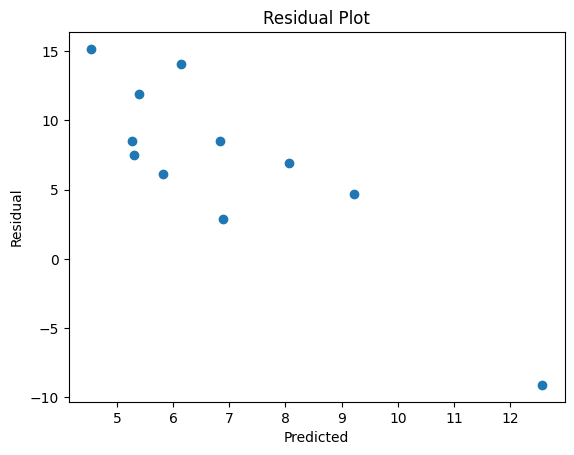

In [8]:
import matplotlib.pyplot as plt

# Get the actual target values for the validation set
y_true = valid[target_col].as_data_frame().values

# Get the predicted target values for the validation set
y_pred = predictions['predict'].as_data_frame().values

# Calculate the residuals
residuals = y_true - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/residuals.png', bbox_inches='tight')
plt.show()

In [9]:
df['2023 inflation'] = np.nan
predictions = model.predict(df)
df['2023 inflation'] = predictions['predict']

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


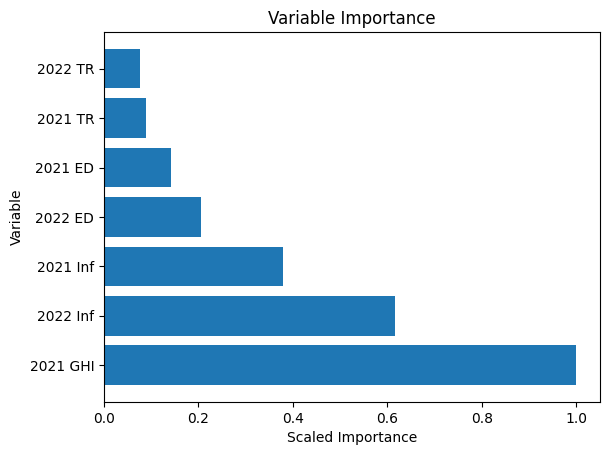

In [10]:
import matplotlib.pyplot as plt
feat_imp = best_model.varimp(use_pandas=True)
plt.barh(feat_imp['variable'], feat_imp['scaled_importance'])
plt.title('Variable Importance')
plt.xlabel('Scaled Importance')
plt.ylabel('Variable')
plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/feature.png', bbox_inches='tight')

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


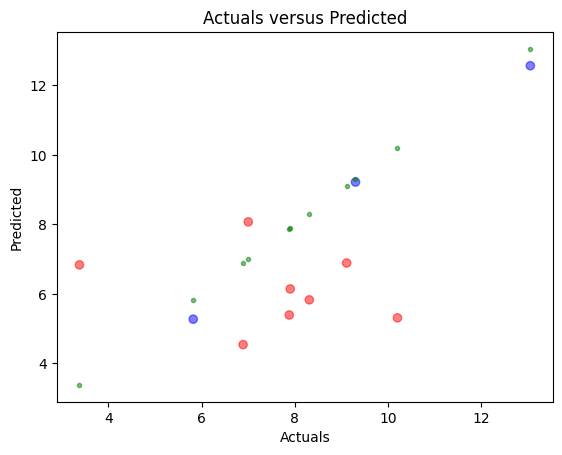

In [15]:
predictions = best_model.predict(valid)



# Extract the actual and predicted values
actuals = df[target_col].as_data_frame().dropna()[target_col].values.flatten()
predicted = predictions["predict"].as_data_frame().values.flatten()
valid_indices = valid.as_data_frame().index.values
actuals = actuals[valid_indices - 1]  # adjust indices to 0-based indexing
residuals = actuals - predicted
abs_residuals = np.abs(residuals)

# Define the colors for the data points
colors = ['blue' if r < 1 else 'red' for r in abs_residuals]
colors = np.array(colors).flatten()
# Plot the residuals against the actual values with colored data points
plt.scatter(actuals, predicted, c=colors, alpha=0.5)
plt.scatter(actuals, actuals, c='g', marker='.', alpha=0.5)
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.title('Actuals versus Predicted')
plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/AvP.png', bbox_inches='tight')
plt.show()